In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
from keras.utils import to_categorical
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Using TensorFlow backend.


In [2]:
correct_output = np.load("bayesian2_true_output_50_0.5.npy")

mc_output_15 = np.load("bayesian2_mc_output_15_0.5.npy")
mc_output_25 = np.load("bayesian2_mc_output_25_0.5.npy")
mc_output_50 = np.load("bayesian2_mc_output_50_0.5.npy")

In [3]:
print(mc_output_50.shape)
print(correct_output.shape)

(2000, 50, 4)
(2000,)


In [4]:
correct_output_cat = to_categorical(correct_output)
print(correct_output_cat.shape)

(2000, 4)


Calculate uncertainties $ U_{\sigma} $ and $ U_{H} $ for true and false matches

In [5]:
correct_u_s_15 = []
incorrect_u_s_15 = []
correct_u_h_15 = []
incorrect_u_h_15 = []

for o, c in zip(mc_output_15, correct_output_cat):
    o_m = o.mean(axis=0)
    
    if o_m.argmax() == c.argmax():
        correct_u_s_15.append(o.var(axis=0).mean())
        correct_u_h_15.append(stats.entropy(o).mean())
    else:
        incorrect_u_s_15.append(o.var(axis=0).mean())
        incorrect_u_h_15.append(stats.entropy(o).mean())

correct_u_s_15_np = np.array(correct_u_s_15)
incorrect_u_s_15_np = np.array(incorrect_u_s_15)
correct_u_h_15_np = np.array(correct_u_h_15)
incorrect_u_h_15_np = np.array(incorrect_u_h_15)

print("correct U_s  :", correct_u_s_15_np.mean())
print("incorrect U_s:", incorrect_u_s_15_np.mean())

print("correct U_h  :", correct_u_h_15_np.mean())
print("incorrect U_h:", incorrect_u_h_15_np.mean())

correct U_s  : 0.0034508249
incorrect U_s: 0.020051079
correct U_h  : 2.2199953
incorrect U_h: 2.346491


In [6]:
correct_u_s_25 = []
incorrect_u_s_25 = []
correct_u_h_25 = []
incorrect_u_h_25 = []

for o, c in zip(mc_output_25, correct_output_cat):
    o_m = o.mean(axis=0)
    
    if o_m.argmax() == c.argmax():
        correct_u_s_25.append(o.var(axis=0).mean())
        correct_u_h_25.append(stats.entropy(o).mean())
    else:
        incorrect_u_s_25.append(o.var(axis=0).mean())
        incorrect_u_h_25.append(stats.entropy(o).mean())

correct_u_s_25_np = np.array(correct_u_s_25)
incorrect_u_s_25_np = np.array(incorrect_u_s_25)
correct_u_h_25_np = np.array(correct_u_h_25)
incorrect_u_h_25_np = np.array(incorrect_u_h_25)

print("correct U_s  :", correct_u_s_25_np.mean())
print("incorrect U_s:", incorrect_u_s_25_np.mean())

print("correct U_h  :", correct_u_h_25_np.mean())
print("incorrect U_h:", incorrect_u_h_25_np.mean())

correct U_s  : 0.0035128528
incorrect U_s: 0.020728344
correct U_h  : 2.6847234
incorrect U_h: 2.8316734


In [7]:
correct_u_s_50 = []
incorrect_u_s_50 = []
correct_u_h_50 = []
incorrect_u_h_50 = []

for o, c in zip(mc_output_50, correct_output_cat):
    o_m = o.mean(axis=0)
    
    if o_m.argmax() == c.argmax():
        correct_u_s_50.append(o.var(axis=0).mean())
        correct_u_h_50.append(stats.entropy(o).mean())
    else:
        incorrect_u_s_50.append(o.var(axis=0).mean())
        incorrect_u_h_50.append(stats.entropy(o).mean())

correct_u_s_50_np = np.array(correct_u_s_50)
incorrect_u_s_50_np = np.array(incorrect_u_s_50)
correct_u_h_50_np = np.array(correct_u_h_50)
incorrect_u_h_50_np = np.array(incorrect_u_h_50)

print("correct U_s  :", correct_u_s_50_np.mean())
print("incorrect U_s:", incorrect_u_s_50_np.mean())

print("correct U_h  :", correct_u_h_50_np.mean())
print("incorrect U_h:", incorrect_u_h_50_np.mean())

correct U_s  : 0.0035606504
incorrect U_s: 0.020642865
correct U_h  : 3.3287635
incorrect U_h: 3.5003846


<IPython.core.display.Javascript object>


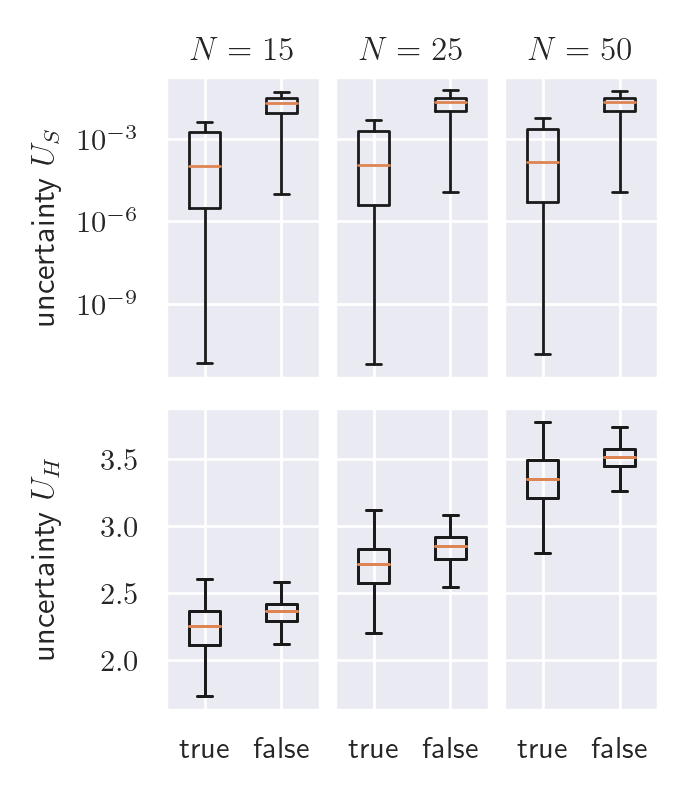

In [8]:
box_width = 0.4

fig, axs = plt.subplots(2, 3, figsize=(3.5, 4), sharex='col', sharey='row')

axs[0,0].boxplot([correct_u_s_15_np, incorrect_u_s_15_np], sym="+", widths=box_width, showfliers=False)
axs[0,0].set_title(r"$ N=15 $")
axs[0,0].set_ylabel(r"uncertainty $ U_{S} $")
axs[0,0].set_xticklabels([r'true', r'false'])

axs[0,1].boxplot([correct_u_s_25_np, incorrect_u_s_25_np], sym="+", widths=box_width, showfliers=False)
axs[0,1].set_title(r"$ N=25 $")
axs[0,1].set_xticklabels([r'true', r'false'])

axs[0,2].boxplot([correct_u_s_50_np, incorrect_u_s_50_np], sym="+", widths=box_width, showfliers=False)
axs[0,2].set_title(r"$ N=50 $")
axs[0,2].set_xticklabels([r'true', r'false'])

ylim = axs[0,0].get_ylim()
#axs[0,0].set_ylim([ylim[0], 0.063])

axs[0,0].set_yscale('log')

In [10]:
axs[1,0].boxplot([correct_u_h_15_np, incorrect_u_h_15_np], sym="+", widths=box_width, showfliers=False)
#axs[0].set_title(r"$N=25$")
axs[1,0].set_ylabel(r"uncertainty $ U_{H} $")
axs[1,0].set_xticklabels([r'true', r'false'])

axs[1,1].boxplot([correct_u_h_25_np, incorrect_u_h_25_np], sym="+", widths=box_width, showfliers=False)
#axs[1].set_title(r"$N=50$")
axs[1,1].set_xticklabels([r'true', r'false'])

axs[1,2].boxplot([correct_u_h_50_np, incorrect_u_h_50_np], sym="+", widths=box_width, showfliers=False)
#axs[2].set_title(r"$N=100$")
axs[1,2].set_xticklabels([r'true', r'false'])

ylim = axs[1,2].get_ylim()
#axs[1,0].set_ylim([1.6, 3.9])
axs[1,0].set_yticks([2.0, 2.5, 3.0, 3.5])

fig.align_ylabels(axs)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()
plt.savefig("boxplots_u_N.pdf", dpi=300, bbox_inches='tight')